In [1]:
### Implementing simple Chatbot Using LangGraph

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [5]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CMEugCxl3m6qMisg7khr74d4DUT99', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6b4d92e5-7574-49bf-994c-4193f8b164de-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

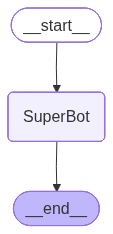

In [7]:
graph=StateGraph(State)
## node
graph.add_node("SuperBot",superbot)
## Edges
graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)
graph_builder=graph.compile()
## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
graph_builder.invoke({'messages':"Hi - My name is Sowmya And I like cricket"})

{'messages': [HumanMessage(content='Hi - My name is Sowmya And I like cricket', additional_kwargs={}, response_metadata={}, id='378852bf-1c95-4007-b36f-44ab742ba970'),
  AIMessage(content="Hi Sowmya! It's great to meet you. Cricket is a fantastic sport with a rich history and a lot of exciting moments. Do you have a favorite cricket team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 19, 'total_tokens': 56, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CMF0m3dqtbRsfAzXcIvUxTp46NR75', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--05a4dd42-8ecc-42c3-93f6-102c5d169896-0', usage_metadata={'input_tokens': 19, 'output_tokens': 37, 'to

In [9]:
for event in graph_builder.stream({"messages":"Hello My name is Sowmya"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello Sowmya! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 14, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CMF1lXHuNjQIhem2Z33OqloebJMtI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2562e458-5d9e-4712-ac59-c9b5b1f2b44b-0', usage_metadata={'input_tokens': 14, 'output_tokens': 12, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
